<a href="https://colab.research.google.com/github/np03cs4a240301-sudo/ConceptandTechnologyofAI/blob/main/2510264_ShubhamBhattarai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/Human_Development_Index_Dataset.csv", encoding = "latin1")

In [3]:
#Problem 1A – Single Year HDI Exploration (2022)
#1 Extract Latest Year:
df['year'].unique()
hdi_2022_df = df[df['year'] == 2022].copy()

In [4]:
#2 Data Exploaration
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.dtypes
# There are no numeric columns stored as text.

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [5]:
#3 Missing Values and Data Cleaning
hdi_2022_df.isna().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [6]:
hdi_2022_df.select_dtypes(include="object").head()
hdi_2022_df.drop_duplicates(inplace=True)

        # There were no duplicated rows to begin with.

hdi_2022_df.replace("-", np.nan, inplace=True)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)
hdi_2022_df.dropna(subset=['hdi_m'], inplace=True)
hdi_2022_df.dropna(subset=['hdi_f'], inplace=True)

median_gii = hdi_2022_df['gender_inequality'].median()
hdi_2022_df['gender_inequality'].fillna(median_gii, inplace=True)

median_sec_f = hdi_2022_df['secondary_education_f_%'].median()
hdi_2022_df['secondary_education_f_%'].fillna(median_sec_f, inplace=True)

median_sec_m = hdi_2022_df['secondary_education_m_%'].median()
hdi_2022_df['secondary_education_m_%'].fillna(median_sec_m, inplace=True)

median_parl_f = hdi_2022_df['seats_in_parliament_f_%'].median()
hdi_2022_df['seats_in_parliament_f_%'].fillna(median_parl_f, inplace=True)

median_parl_m = hdi_2022_df['seats_in_parliament_m_%'].median()
hdi_2022_df['seats_in_parliament_m_%'].fillna(median_parl_m, inplace=True)

median_co2 = hdi_2022_df['co2_emission_tons'].median()
hdi_2022_df['co2_emission_tons'].fillna(median_co2, inplace=True)

median_mat = hdi_2022_df['mat_footprint_percap_tons'].median()
hdi_2022_df['mat_footprint_percap_tons'].fillna(median_mat, inplace=True)


hdi_2022_df['country'] = hdi_2022_df['country'].str.strip().str.title()
hdi_2022_df['country'].str.strip().value_counts()
non_countries = [
    'Very High Human Development',
    'High Human Development',
    'Medium Human Development',
    'Low Human Development',
    'Arab States',
    'East Asia And The Pacific',
    'Europe And Central Asia',
    'Latin America And The Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
hdi_2022_df = hdi_2022_df[~hdi_2022_df['country'].isin(non_countries)]
hdi_2022_df['country'].unique()

/tmp/ipython-input-3551654817.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_2022_df['gender_inequality'].fillna(median_gii, inplace=True)
/tmp/ipython-input-3551654817.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State Of)',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica',
       "Côte D'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini (Kingdom Of)', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong, China (Sar

In [7]:
#4 Basic Statistics:
hdi_2022_df['hdi'].mean()
hdi_2022_df['hdi'].median()
hdi_2022_df['hdi'].std()

highest_hdi_2022_row = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]
print(highest_hdi_2022_row["country"], highest_hdi_2022_row["hdi"])

lowest_hdi_2022_row =  hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]
print(lowest_hdi_2022_row["country"], lowest_hdi_2022_row["hdi"])

Switzerland 0.967
Somalia 0.38


In [8]:
#5 Filtering and Sorting
high_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
high_hdi.head()
top_gni = high_hdi.sort_values(by="gross_inc_percap", ascending = False)
top_gni.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,0.360,67.400002,69.926325,28.000000,72.000000,52.79,67.26,3.736776,10.136331
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.591200
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.150800
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.346700
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.190300
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.163200
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.591300
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.051500
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.349800
2474,2475,HKG,"Hong Kong, China (Sar)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,0.360,77.866913,84.067802,24.759615,75.240385,52.91,64.71,4.373242,10.136331


In [9]:

#6 Adding HDI Category Column
def classify_hdi(value):
    if value < 0.550:
        return "Low"
    elif 0.550 <= value <= 0.699:
        return "Medium"
    elif 0.700 <= value <= 0.799:
        return "High"
    elif value >= 0.800:
        return "Very High"
    else:
        return "Invalid Input"

hdi_2022_df["HDI_Category"] = hdi_2022_df['hdi'].apply(classify_hdi)
hdi_2022_df[["country", "hdi", "HDI_Category"]].head(10)
hdi_2022_df["HDI_Category"].value_counts()
hdi_2022_df.to_csv("HDI_category_added.csv", index = False)

In [10]:
 # Problem 1B – HDI Trends (2020–2022)
#1 Data Extraction and Saving
hdi_2020_22 = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_2020_22.to_csv("HDI_problem1B.csv", index = False)

In [11]:
#2 Data Cleaning
hdi_2020_22.replace("-", np.nan, inplace=True)
hdi_2020_22['country'] = hdi_2020_22['country'].str.strip().str.title()
hdi_2020_22['country'].str.strip().value_counts()
non_countries = [
    'Very High Human Development',
    'High Human Development',
    'Medium Human Development',
    'Low Human Development',
    'Arab States',
    'East Asia And The Pacific',
    'Europe And Central Asia',
    'Latin America And The Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
hdi_2020_22 = hdi_2020_22[~hdi_2020_22['country'].isin(non_countries)]
hdi_2020_22['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State Of)', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica',
       "Côte D'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom Of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [12]:
hdi_2020_22.isna().sum()
hdi_2020_22.select_dtypes(include="object").head()
hdi_2020_22.drop_duplicates(inplace=True)
hdi_2020_22.replace("-", np.nan, inplace=True)
hdi_2020_22.dropna(subset=['hdi'], inplace=True)
hdi_2020_22.dropna(subset=['hdi_m'], inplace=True)
hdi_2020_22.dropna(subset=['hdi_f'], inplace=True)

median_gii = hdi_2020_22['gender_inequality'].median()
hdi_2020_22['gender_inequality'] = hdi_2020_22['gender_inequality'].fillna(median_gii)

mean_eys = hdi_2020_22['expec_yr_school'].mean()
hdi_2020_22['expec_yr_school'] = hdi_2020_22['expec_yr_school'].fillna(mean_eys)

mean_eys_f = hdi_2020_22['expec_yr_school_f'].mean()
hdi_2020_22['expec_yr_school_f'] = hdi_2020_22['expec_yr_school_f'].fillna(mean_eys_f)

mean_eys_m = hdi_2020_22['expec_yr_school_m'].mean()
hdi_2020_22['expec_yr_school_m'] = hdi_2020_22['expec_yr_school_m'].fillna(mean_eys_m)

mean_yrs = hdi_2020_22['mean_yr_school'].mean()
hdi_2020_22['mean_yr_school'] = hdi_2020_22['mean_yr_school'].fillna(mean_yrs)

mean_yrs_f = hdi_2020_22['mean_yr_school_f'].mean()
hdi_2020_22['mean_yr_school_f'] = hdi_2020_22['mean_yr_school_f'].fillna(mean_yrs_f)

mean_yrs_m = hdi_2020_22['mean_yr_school_m'].mean()
hdi_2020_22['mean_yr_school_m'] = hdi_2020_22['mean_yr_school_m'].fillna(mean_yrs_m)

mean_gip = hdi_2020_22['gross_inc_percap'].mean()
hdi_2020_22['gross_inc_percap'] = hdi_2020_22['gross_inc_percap'].fillna(mean_gip)

mean_gip_f = hdi_2020_22['gross_inc_percap_f'].mean()
hdi_2020_22['gross_inc_percap_f'] = hdi_2020_22['gross_inc_percap_f'].fillna(mean_gip_f)

mean_gip_m = hdi_2020_22['gross_inc_percap_m'].mean()
hdi_2020_22['gross_inc_percap_m'] = hdi_2020_22['gross_inc_percap_m'].fillna(mean_gip_m)

median_sec_f = hdi_2020_22['secondary_education_f_%'].median()
hdi_2020_22['secondary_education_f_%'] = hdi_2020_22['secondary_education_f_%'].fillna(median_sec_f)

median_sec_m = hdi_2020_22['secondary_education_m_%'].median()
hdi_2020_22['secondary_education_m_%'] = hdi_2020_22['secondary_education_m_%'].fillna(median_sec_m)

median_parl_f = hdi_2020_22['seats_in_parliament_f_%'].median()
hdi_2020_22['seats_in_parliament_f_%'] = hdi_2020_22['seats_in_parliament_f_%'].fillna(median_parl_f)

median_parl_m = hdi_2020_22['seats_in_parliament_m_%'].median()
hdi_2020_22['seats_in_parliament_m_%'] = hdi_2020_22['seats_in_parliament_m_%'].fillna(median_parl_m)

median_co2 = hdi_2020_22['co2_emission_tons'].median()
hdi_2020_22['co2_emission_tons'] = hdi_2020_22['co2_emission_tons'].fillna(median_co2)

median_mat = hdi_2020_22['mat_footprint_percap_tons'].median()
hdi_2020_22['mat_footprint_percap_tons'] = hdi_2020_22['mat_footprint_percap_tons'].fillna(median_mat)

In [13]:
#3 Visualization Tasks:
#A. Line Chart-HDI Trend (Country-Level):
countries = ['Nepal', 'India', 'China', 'Bhutan', 'Japan']
subset = hdi_2020_22[hdi_2020_22['country'].isin(countries)]

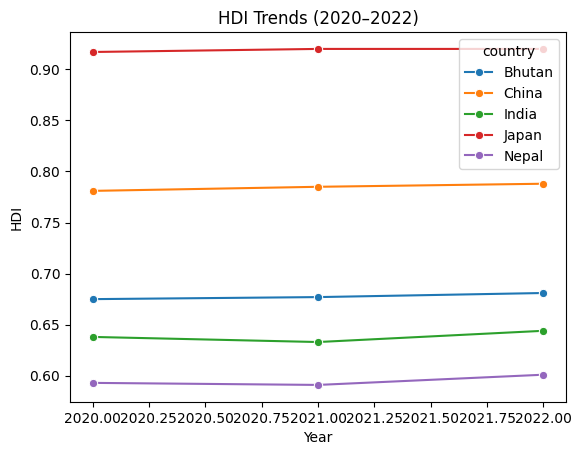

In [14]:
plt.figure()
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trends (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

In [15]:
#B. Generate Visualizations:
#Bar Chart: Average HDI by Region (2020–2022)
region_map = {
    #South-Asia
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',

    #East-Asia and Pacific
    'China': 'East Asia & Pacific',
    'Japan': 'East Asia & Pacific',
    'Australia': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific',
    'Indonesia': 'East Asia & Pacific',
    'Philippines': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific',
    'Thailand': 'East Asia & Pacific',

    #Europe and Central Asia
    'Germany': 'Europe & Central Asia',
    'France': 'Europe & Central Asia',
    'United Kingdom': 'Europe & Central Asia',
    'Russia': 'Europe & Central Asia',
    'Italy': 'Europe & Central Asia',
    'Spain': 'Europe & Central Asia',

    #Latin America and Caribbean
    'Brazil': 'Latin America & Caribbean',
    'Mexico': 'Latin America & Caribbean',
    'Argentina': 'Latin America & Caribbean',
    'Chile': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean',

    #Sub-Saharan Africa
    'Nigeria': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',

    #North America
    'United States': 'North America',
    'Canada': 'North America',

    #Arab States
    'Egypt': 'Arab States',
    'Saudi Arabia': 'Arab States',
    'United Arab Emirates': 'Arab States',
    'Jordan': 'Arab States',
}
hdi_2020_22['region'] = hdi_2020_22['country'].map(region_map)
hdi_region = hdi_2020_22.dropna(subset=['region'])
hdi_region[['country', 'region']].drop_duplicates().head(20)

,country,region
30,Afghanistan,South Asia
228,Argentina,Latin America & Caribbean
294,Australia,East Asia & Pacific
459,Bangladesh,South Asia
657,Bhutan,South Asia
789,Brazil,Latin America & Caribbean
1053,Canada,North America
1152,Chile,Latin America & Caribbean
1185,China,East Asia & Pacific
1218,Colombia,Latin America & Caribbean


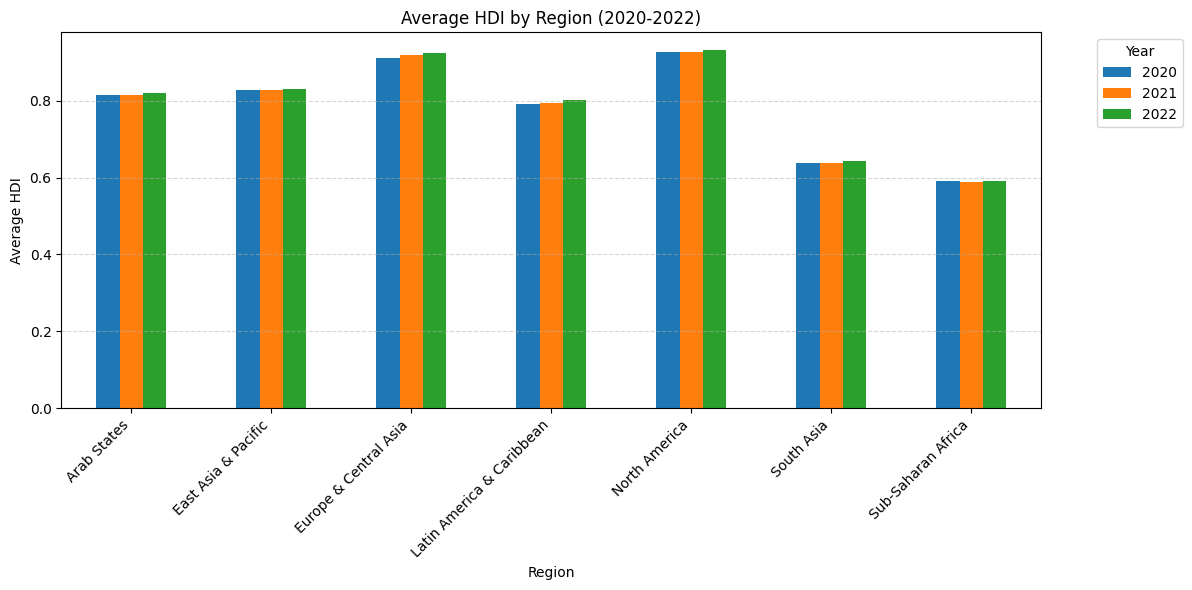

In [16]:
region_hdi = hdi_region.groupby(['region', 'year'])['hdi'].mean().unstack()
region_hdi.plot(kind='bar', figsize=(12,6))

plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.title('Average HDI by Region (2020-2022)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

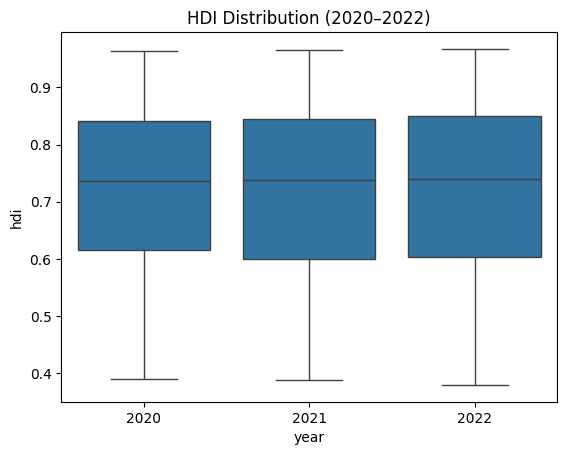

In [17]:
plt.figure()
sns.boxplot(data=hdi_2020_22, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()

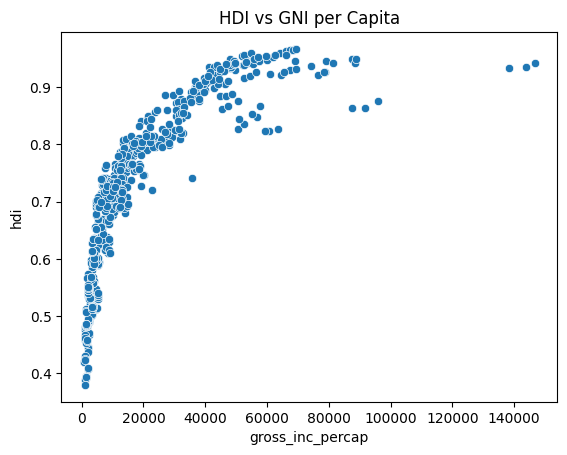

In [18]:
plt.figure()
sns.scatterplot(data=hdi_2020_22, x='gross_inc_percap', y='hdi')
plt.title("HDI vs GNI per Capita")
plt.show()

In [19]:
#4 Short Analysis Questions:
#a.Which countries show the greatest improvement in HDI from 2020 to 2022?
df_hdi_change = hdi_2020_22[hdi_2020_22['year'].isin([2020, 2022])]
hdi_pivot = df_hdi_change.pivot(index='country', columns='year', values='hdi')
hdi_pivot.columns = ['HDI_2020', 'HDI_2022']
hdi_pivot = hdi_pivot.dropna()
hdi_pivot['HDI_change'] = hdi_pivot['HDI_2022'] - hdi_pivot['HDI_2020']
top_improved = hdi_pivot.sort_values(by='HDI_change', ascending=False).head(10)
top_improved

,HDI_2020,HDI_2022,HDI_change
country,,,
Azerbaijan,0.722,0.760,0.038
Ecuador,0.734,0.765,0.031
Maldives,0.737,0.762,0.025
Mexico,0.757,0.781,0.024
Tajikistan,0.656,0.679,0.023
San Marino,0.844,0.867,0.023
Bahamas,0.798,0.820,0.022
Kuwait,0.826,0.847,0.021
Türkiye,0.835,0.855,0.020


In [20]:
#b Did any countries experience a decline in HDI? Provide possible reasons.
decline_hdi = hdi_pivot[hdi_pivot['HDI_change'] < 0]
decline_hdi_sorted = decline_hdi.sort_values(by='HDI_change')
decline_hdi_sorted

,HDI_2020,HDI_2022,HDI_change
country,,,
Timor-Leste,0.633,0.566,-0.067
Ukraine,0.762,0.734,-0.028
Afghanistan,0.488,0.462,-0.026
Namibia,0.634,0.610,-0.024
Lebanon,0.742,0.723,-0.019
Suriname,0.702,0.690,-0.012
Eswatini (Kingdom Of),0.622,0.610,-0.012
Gabon,0.704,0.693,-0.011
Paraguay,0.742,0.731,-0.011


In [21]:
#c Which region has the highest and lowest average HDI across these three years?
avg_hdi_region = hdi_region.groupby('region')['hdi'].mean().sort_values(ascending=False)
avg_hdi_region


,hdi
region,
North America,0.928000
Europe & Central Asia,0.917267
East Asia & Pacific,0.828714
Arab States,0.816333
Latin America & Caribbean,0.795600
South Asia,0.639583
Sub-Saharan Africa,0.590533


In [22]:
#Problem 2
#Advanced HDI Exploration
#1 Create South Asia Subset

south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
hdi_south_asia = df[df['country'].isin(south_asia_countries)].copy()
hdi_south_asia.to_csv("HDI_SouthAsia.csv", index = False)
hdi_south_asia['country'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [23]:
#2 Composite Development Score
hdi_south_asia = hdi_south_asia.copy()
le_max = hdi_south_asia['life_expectancy'].max()
le_min = hdi_south_asia['life_expectancy'].min()
hdi_south_asia.loc[:, 'life_exp_index'] = (hdi_south_asia['life_expectancy'] - le_min) / (le_max - le_min)
gni_min = hdi_south_asia['gross_inc_percap'].min()
gni_max = hdi_south_asia['gross_inc_percap'].max()
hdi_south_asia.loc[:, 'gni_index'] = (hdi_south_asia['gross_inc_percap'] - gni_min)/ (gni_max - gni_min)

hdi_south_asia.loc[:, 'composite_score'] = (0.30 * hdi_south_asia['life_exp_index'] + 0.30 * hdi_south_asia['gni_index'])
south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022]
composite_ranking = south_asia_2022.sort_values(by = 'composite_score', ascending = False)
composite_ranking[['country', 'composite_score']]

,country,composite_score
3530,Maldives,0.600000
5477,Sri Lanka,0.446959
659,Bhutan,0.387867
461,Bangladesh,0.331426
2573,India,0.287583
4091,Nepal,0.262039
4388,Pakistan,0.249819
32,Afghanistan,0.151438


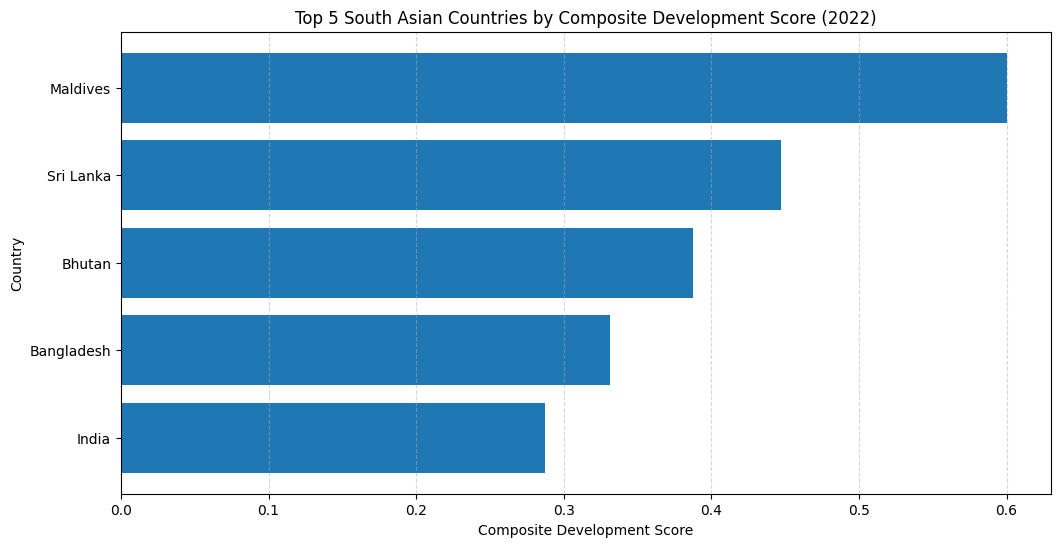

In [24]:
top5 = composite_ranking.head(5)

plt.figure(figsize = (12,6))
plt.barh(top5['country'], top5['composite_score'])
plt.xlabel("Composite Development Score")
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Development Score (2022)')
plt.gca().invert_yaxis()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.show()

In [25]:
comparison = south_asia_2022.sort_values(by='hdi', ascending=False)[['country', 'hdi', 'composite_score']]
print(comparison)


          country    hdi  composite_score
5477    Sri Lanka  0.780         0.446959
3530     Maldives  0.762         0.600000
659        Bhutan  0.681         0.387867
461    Bangladesh  0.670         0.331426
2573        India  0.644         0.287583
4091        Nepal  0.601         0.262039
4388     Pakistan  0.540         0.249819
32    Afghanistan  0.462         0.151438


In [26]:
# 3. Outlier Detection:

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (series < lower_bound) | (series > upper_bound)

In [27]:
south_asia_2022_data = hdi_south_asia[hdi_south_asia['year'] == 2022].copy()
south_asia_2022_data['hdi_outlier'] = detect_outliers(south_asia_2022_data['hdi'])
south_asia_2022_data['gni_outlier'] = detect_outliers(south_asia_2022_data['gross_inc_percap'])
south_asia_2022_data['outlier'] = south_asia_2022_data['hdi_outlier'] | south_asia_2022_data['gni_outlier']
south_asia_2022_data[['country', 'hdi', 'gross_inc_percap', 'outlier']]

,country,hdi,gross_inc_percap,outlier
32,Afghanistan,0.462,1335.205733,False
461,Bangladesh,0.670,6511.122178,False
659,Bhutan,0.681,10624.873880,False
2573,India,0.644,6950.526798,False
3530,Maldives,0.762,18846.792190,False
4091,Nepal,0.601,4025.554685,False
4388,Pakistan,0.540,5374.270423,False
5477,Sri Lanka,0.780,11899.498470,False


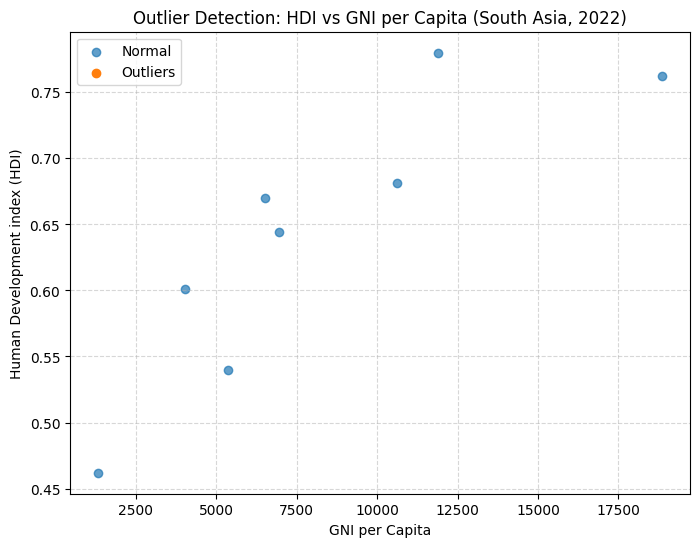

In [28]:
plt.figure(figsize = (8,6))

plt.scatter(
    south_asia_2022_data[~south_asia_2022_data['outlier']]['gross_inc_percap'],
    south_asia_2022_data[~south_asia_2022_data['outlier']]['hdi'],
    label = 'Normal',
    alpha = 0.7
        )
plt.scatter(
    south_asia_2022_data[south_asia_2022_data['outlier']]['gross_inc_percap'],
    south_asia_2022_data[south_asia_2022_data['outlier']]['hdi'],
    label = "Outliers",
    marker = 'o'
        )

plt.xlabel('GNI per Capita')
plt.ylabel('Human Development index (HDI)')
plt.title('Outlier Detection: HDI vs GNI per Capita (South Asia, 2022)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.show()

In [29]:
#4. Exploring Metric Relationships:

metrics = ['gender_development', 'life_expectancy', 'hdi']
corr_matrix = hdi_south_asia[metrics].corr(method = 'pearson')
print(corr_matrix['hdi'].sort_values(ascending = False))

hdi                   1.000000
life_expectancy       0.958761
gender_development    0.865621
Name: hdi, dtype: float64


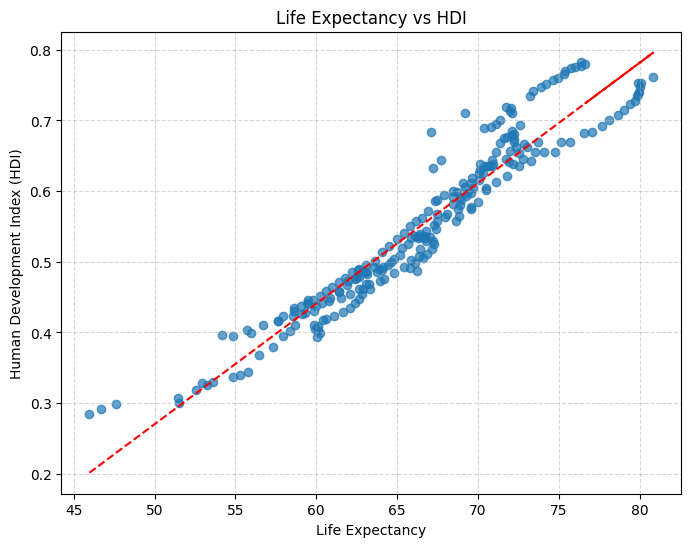

In [30]:
subset = hdi_south_asia[['life_expectancy', 'hdi']].dropna()

plt.figure(figsize=(8,6))
plt.scatter(subset['life_expectancy'], subset['hdi'], alpha=0.7)

plt.xlabel('Life Expectancy')
plt.ylabel('Human Development Index (HDI)')
plt.title('Life Expectancy vs HDI')

z = np.polyfit(subset['life_expectancy'], subset['hdi'], 1)
p = np.poly1d(z)
plt.plot(subset['life_expectancy'], p(subset['life_expectancy']), "r--")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

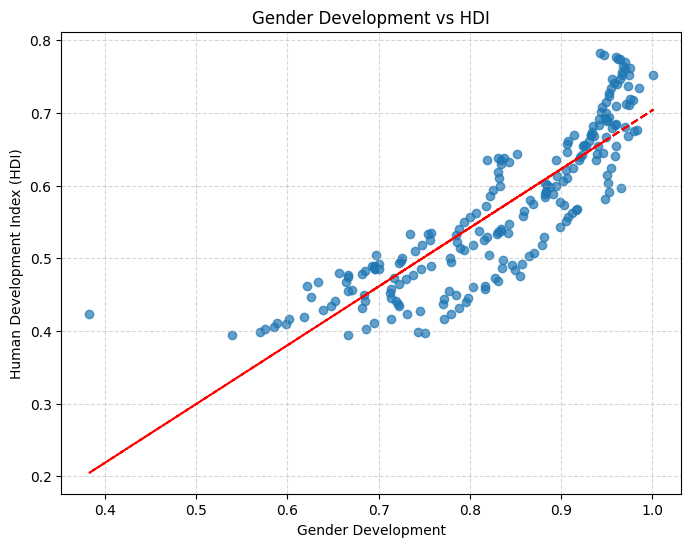

In [31]:
subset = hdi_south_asia[['gender_development', 'hdi']].dropna()
plt.figure(figsize=(8,6))
plt.scatter(subset['gender_development'], subset['hdi'], alpha=0.7)
plt.xlabel('Gender Development')
plt.ylabel('Human Development Index (HDI)')
plt.title('Gender Development vs HDI')

z = np.polyfit(subset['gender_development'], subset['hdi'], 1)
p = np.poly1d(z)
plt.plot(subset['gender_development'], p(subset['gender_development']), "r--")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [32]:
hdi_south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022]
hdi_south_asia_2022 = hdi_south_asia_2022[['country', 'gross_inc_percap', 'hdi']].dropna()
hdi_south_asia_2022['gni_hdi_gap'] = hdi_south_asia_2022['gross_inc_percap'] - hdi_south_asia_2022['hdi']
gap_desc = hdi_south_asia_2022.sort_values(by='gni_hdi_gap', ascending=False)
gap_desc

,country,gross_inc_percap,hdi,gni_hdi_gap
3530,Maldives,18846.792190,0.762,18846.030190
5477,Sri Lanka,11899.498470,0.780,11898.718470
659,Bhutan,10624.873880,0.681,10624.192880
2573,India,6950.526798,0.644,6949.882798
461,Bangladesh,6511.122178,0.670,6510.452178
4388,Pakistan,5374.270423,0.540,5373.730423
4091,Nepal,4025.554685,0.601,4024.953685
32,Afghanistan,1335.205733,0.462,1334.743733


In [33]:
gap_asc = hdi_south_asia_2022.sort_values(by='gni_hdi_gap', ascending=True)
gap_asc

,country,gross_inc_percap,hdi,gni_hdi_gap
32,Afghanistan,1335.205733,0.462,1334.743733
4091,Nepal,4025.554685,0.601,4024.953685
4388,Pakistan,5374.270423,0.540,5373.730423
461,Bangladesh,6511.122178,0.670,6510.452178
2573,India,6950.526798,0.644,6949.882798
659,Bhutan,10624.873880,0.681,10624.192880
5477,Sri Lanka,11899.498470,0.780,11898.718470
3530,Maldives,18846.792190,0.762,18846.030190


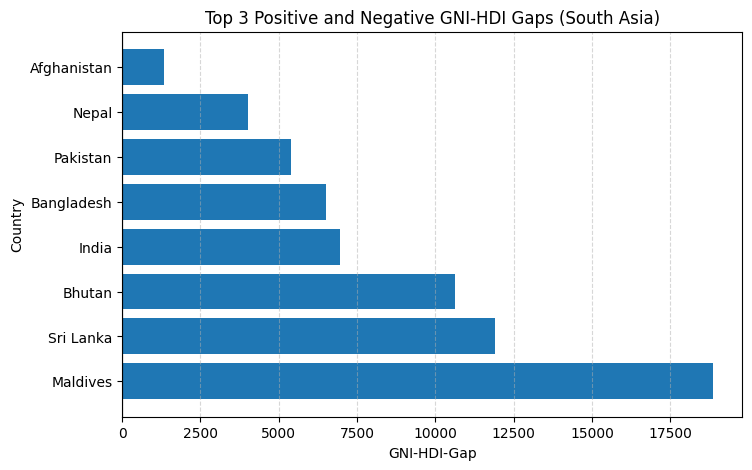

In [34]:
top_positive = gap_desc.head(10)
top_negative = gap_asc.head(10)

plot_data = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8,5))
plt.barh(plot_data['country'], plot_data['gni_hdi_gap'])
plt.axvline(0, color='black', linewidth=0.8)

plt.xlabel('GNI-HDI-Gap')
plt.ylabel('Country')
plt.title('Top 3 Positive and Negative GNI-HDI Gaps (South Asia)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [35]:
#Problem 3.
#Comparative Regional Analysis: South Asia vs Middle East

# 1. Create Middle East Subset:

hdi = pd.read_csv("HDI_problem1B.csv")
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
hdi_2020_2022 = hdi[hdi['year'].isin([2020, 2021, 2022])]
hdi_south_asia = hdi_2020_2022[hdi_2020_2022['country'].isin(south_asia_countries)]
hdi_middle_east = hdi_2020_2022[hdi_2020_2022['country'].isin(middle_east_countries)]
hdi_south_asia.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

In [36]:
# 2. Descriptive Statistics:

south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

south_asia_mean = south_asia['hdi'].mean()
south_asia_std = south_asia['hdi'].std()

mea_mean = middle_east['hdi'].mean()
mea_std = middle_east['hdi'].std()

stats = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Mean HDI (2020-2022)': [south_asia_mean, mea_mean],
    'HDI Standard Deviation (2020-2022)': [south_asia_std, mea_std]
})
stats

,Region,Mean HDI (2020-2022),HDI Standard Deviation (2020-2022)
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


In [37]:
# 3. Top and Bottom Performers:

sa_avg = south_asia.groupby('country')['hdi'].mean().reset_index()
me_avg = middle_east.groupby('country')['hdi'].mean().reset_index()
sa_top_3 = sa_avg.sort_values('hdi', ascending=False).head(3)
sa_bottom_3 = sa_avg.sort_values('hdi').head(3)
me_top_3 = me_avg.sort_values('hdi', ascending=False).head(3)
me_bottom_3 = me_avg.sort_values('hdi').head(3)
combined = pd.concat([
    sa_top_3.assign(region='South Asia', group='Top 3'),
    sa_bottom_3.assign(region='South Asia', group='Bottom 3'),
    me_top_3.assign(region='Middle East', group='Top 3'),
    me_bottom_3.assign(region='Middle East', group='Bottom 3')

])
combined

,country,hdi,region,group
7,Sri Lanka,0.780000,South Asia,Top 3
4,Maldives,0.750667,South Asia,Top 3
2,Bhutan,0.677667,South Asia,Top 3
0,Afghanistan,0.474333,South Asia,Bottom 3
6,Pakistan,0.537667,South Asia,Bottom 3
5,Nepal,0.595000,South Asia,Bottom 3
9,United Arab Emirates,0.932667,Middle East,Top 3
2,Israel,0.910667,Middle East,Top 3
0,Bahrain,0.885333,Middle East,Top 3
10,Yemen,0.426333,Middle East,Bottom 3


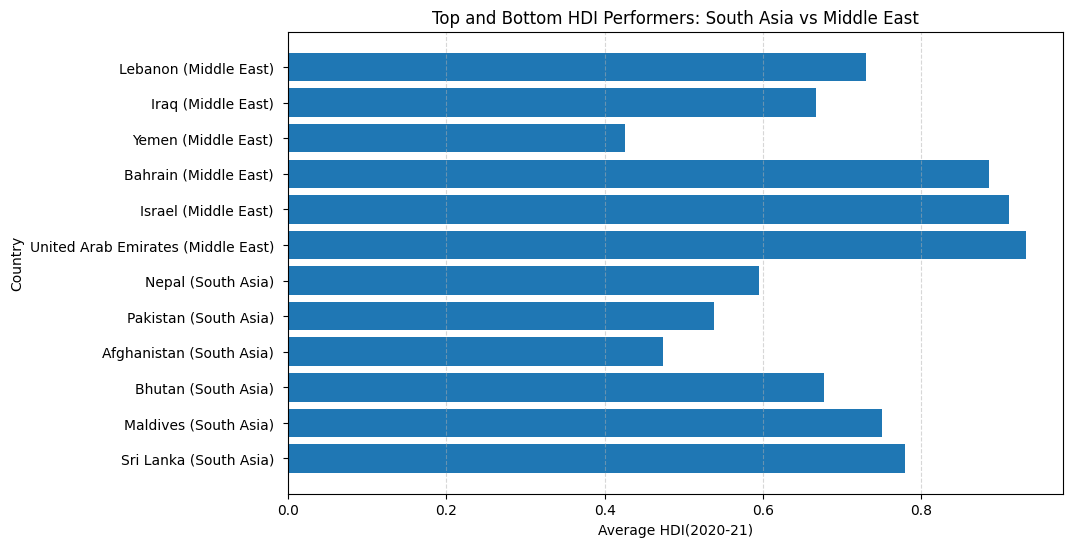

In [38]:
plt.figure(figsize = (10,6))
labels = combined['country'] + " (" + combined['region'] + ") "
plt.barh(labels, combined['hdi'])
plt.xlabel('Average HDI(2020-21)')
plt.ylabel('Country')
plt.title('Top and Bottom HDI Performers: South Asia vs Middle East')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [39]:
# 4. Metric Comparisons:

metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
sa_means = south_asia[metrics].mean()
mea_means = middle_east[metrics].mean()
comparison = pd.DataFrame({
    'South Asia': sa_means,
    'Middle East': mea_means})
comparison

,South Asia,Middle East
gender_development,0.881458,0.896545
life_expectancy,70.970083,75.855455
gross_inc_percap,7766.509931,37750.770520


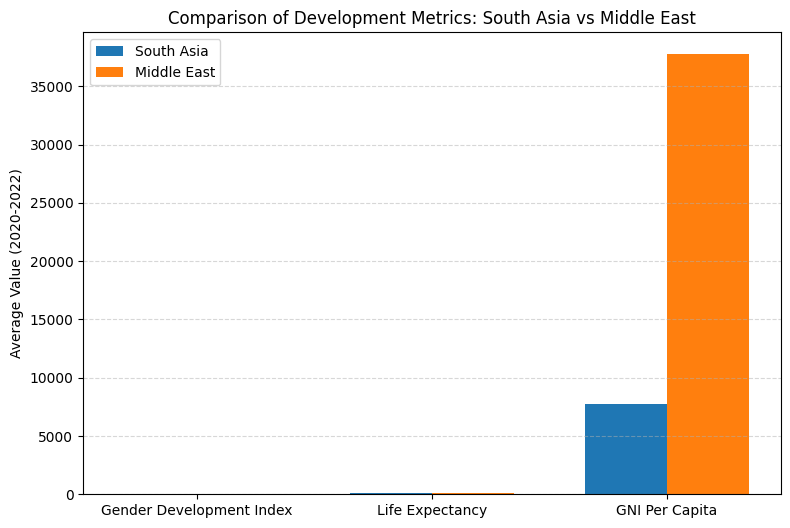

In [40]:
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(9,6))
plt.bar(x - width/2, comparison['South Asia'], width, label='South Asia')
plt.bar(x + width/2, comparison['Middle East'], width, label='Middle East')

plt.xticks(x, [
    'Gender Development Index',
    'Life Expectancy',
    'GNI Per Capita'
])

plt.ylabel('Average Value (2020-2022)')
plt.title('Comparison of Development Metrics: South Asia vs Middle East')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [41]:
# 5. HDI Disparity:
sa_range = south_asia['hdi'].max() - south_asia['hdi'].min()
mea_range = middle_east['hdi'].max() - middle_east['hdi'].min()
sa_mean = south_asia['hdi'].mean()
sa_std = south_asia['hdi'].std()
sa_cv = sa_std/sa_mean
mea_mean = middle_east['hdi'].mean()
mea_std = middle_east['hdi'].std()
mea_cv = mea_std/mea_mean
variation_stats = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'HDI_Range': [sa_range, mea_range],
    'HDI Coefficient of Variance': [sa_cv, mea_cv]
})
variation_stats

,Region,HDI_Range,HDI Coefficient of Variance
0,South Asia,0.321,0.153652
1,Middle East,0.513,0.179101


In [42]:
# 6. Correlation Analysis:
sa_corr_gender = south_asia['hdi'].corr(south_asia['gender_development'])
sa_corr_life = south_asia['hdi'].corr(south_asia['life_expectancy'])
mea_corr_gender = middle_east['hdi'].corr(middle_east['gender_development'])
mea_corr_life = middle_east['hdi'].corr(middle_east['life_expectancy'])

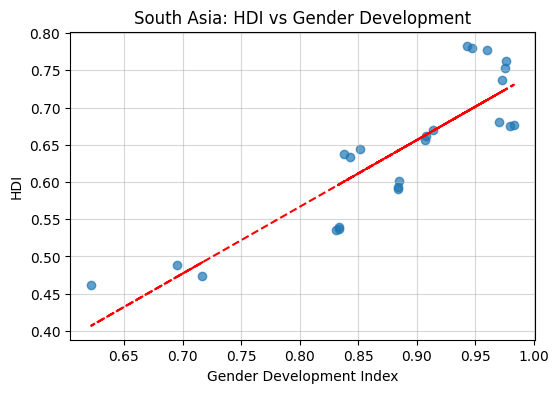

In [43]:
subset = hdi_south_asia[['gender_development', 'hdi']].dropna()

x_plot = subset['gender_development']
y_plot = subset['hdi']

m, b = np.polyfit(x_plot, y_plot, 1)

plt.figure(figsize=(6,4))
plt.scatter(x_plot, y_plot, alpha=0.7)
plt.plot(x_plot, m*x_plot + b, "r--")

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Gender Development')
plt.grid(alpha=0.5)
plt.show()

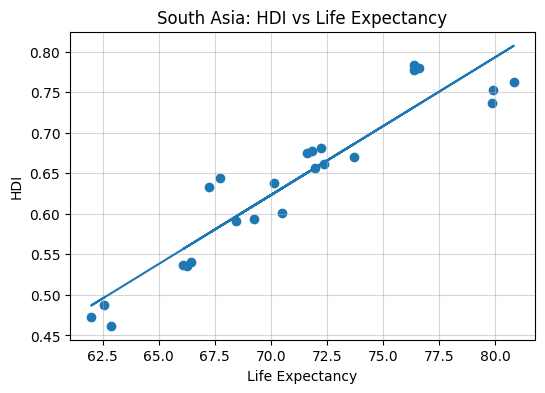

In [44]:
x = south_asia['life_expectancy']
y = south_asia['hdi']

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Life Expectancy')
plt.grid(alpha=0.5)
plt.show()

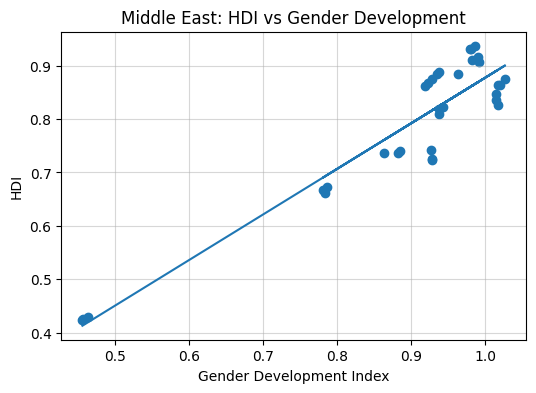

In [45]:
x = middle_east['gender_development']
y = middle_east['hdi']

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs Gender Development')
plt.grid(alpha=0.5)
plt.show()

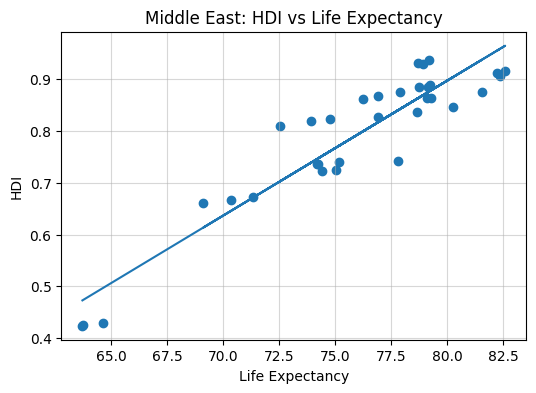

In [46]:
x = middle_east['life_expectancy']
y = middle_east['hdi']

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs Life Expectancy')
plt.grid(alpha=0.5)
plt.show()

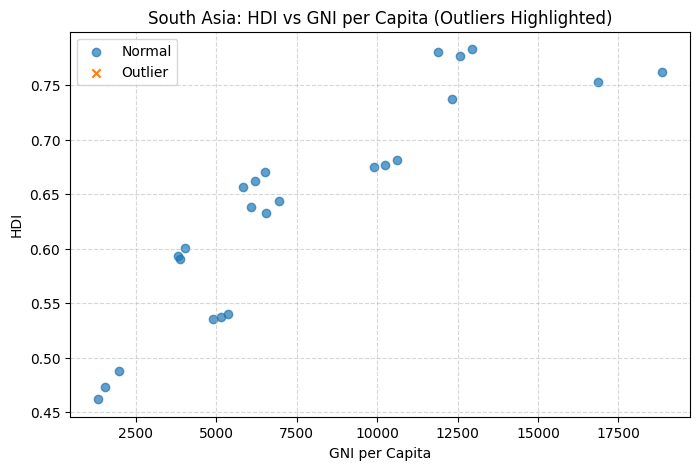

In [47]:
# 7. Outlier Detection:
south_asia['hdi_outlier'] = detect_outliers(south_asia['hdi'])
south_asia['gni_outlier'] = detect_outliers(south_asia['gross_inc_percap'])
south_asia['outlier'] = (south_asia['hdi_outlier'] | south_asia['gni_outlier'])

middle_east['hdi_outlier'] = detect_outliers(middle_east['hdi'])
middle_east['gni_outlier'] = detect_outliers(middle_east['gross_inc_percap'])
middle_east['outlier'] = (middle_east['hdi_outlier'] | middle_east['gni_outlier'])
plt.figure(figsize=(8,5))

plt.scatter(
    south_asia.loc[~south_asia['outlier'], 'gross_inc_percap'],
    south_asia.loc[~south_asia['outlier'], 'hdi'],
    label='Normal',
    alpha=0.7
)

plt.scatter(
    south_asia.loc[south_asia['outlier'], 'gross_inc_percap'],
    south_asia.loc[south_asia['outlier'], 'hdi'],
    label='Outlier',
    marker='x'
)

plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs GNI per Capita (Outliers Highlighted)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

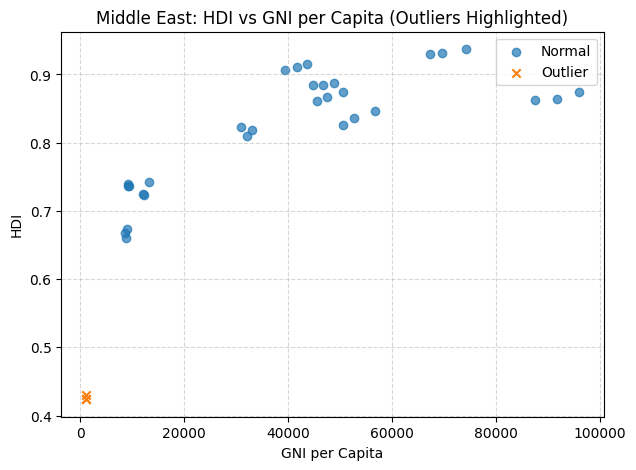

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(
    middle_east.loc[~middle_east['outlier'], 'gross_inc_percap'],
    middle_east.loc[~middle_east['outlier'], 'hdi'],
    label='Normal',
    alpha=0.7
)
plt.scatter(
    middle_east.loc[middle_east['outlier'], 'gross_inc_percap'],
    middle_east.loc[middle_east['outlier'], 'hdi'],
    label='Outlier',
    marker='x'
)
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs GNI per Capita (Outliers Highlighted)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()